In [56]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [57]:
# Some functions for plotting. You don't have to understand how any
# of the functions in this cell work, since they use things we 
# haven't learned about in Data 8.


def resize_window(lim=3.5):
    plots.xlim(-lim, lim)
    plots.ylim(-lim, lim)
    
def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='r'):
    y = x*slope + intercept
    plots.plot(x, y, color=color)
    
def draw_vertical_line(x_position, color='black'):
    x = make_array(x_position, x_position)
    y = make_array(-4, 4)
    plots.plot(x, y, color=color)
    
def make_correlated_data(r):
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    return x, y

def r_scatter(r):
    """Generate a scatter plot with a correlation approximately r"""
    plots.figure(figsize=(5,5))
    x, y = make_correlated_data(r)
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    
def r_table(r):
    """
    Generate a table of 1000 data points with a correlation approximately r
    """
    np.random.seed(8)
    x, y = make_correlated_data(r)
    return Table().with_columns('x', x, 'y', y)

## Correlation ##

In [62]:
hybrid = Table.read_table('data/hybrid.csv')
suv = hybrid.where('class', 'SUV').drop('class', 'year')
suv.sort('msrp', descending = True)

vehicle,msrp,acceleration,mpg
ActiveHybrid X6,97237.9,17.96,18.82
Cadillac Escalade,78932.8,9.09,22.35
Escalade 2WD,74425,11.63,21
Cayenne S,73183.5,14.71,26.11
Cayenne S,69850,16.39,21
Cayenne S,67902.3,18.52,21
Touareg,64198.9,15.38,28.7
Touareg,62575,16.13,21
Yukon 1500,61960,13.33,21
ML450 Blue HV,60519.8,12.6,23.99


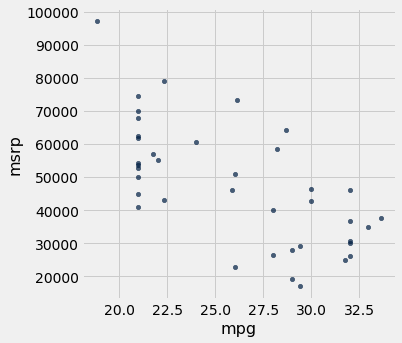

In [60]:
suv.scatter('mpg', 'msrp')

In [63]:
def standard_units(x):
    """Converts an array x to standard units"""
    return (x - np.mean(x)) / np.std(x)

In [65]:
# Convert MPG and MSRP columns to standard units
# and put them back in the table.

mpg = suv.column('mpg')
msrp = suv.column('msrp')

suv = suv.with_columns(
    'mpg in standard units', standard_units(mpg),
    'msrp in standard units', standard_units(msrp),
)
suv

vehicle,msrp,acceleration,mpg,mpg in standard units,msrp in standard units
Escape,36676.1,10.32,31.99,1.31784,-0.60884
Lexus RX400h,58521.1,12.76,28.23,0.48955,0.605991
Highlander,29186.2,12.76,29.4,0.747288,-1.02536
Escape 2WD,19322.6,9.52,29,0.659172,-1.57389
Mercury Mariner,34772.4,8.98,32.93,1.52491,-0.714707
Chevrolet Tahoe,42924.3,10.91,22.35,-0.805749,-0.261367
Kluger,46229.5,12.76,25.87,-0.0303321,-0.0775641
Tribute,24823.8,11.28,31.75,1.26497,-1.26796
GMC Yukon,57094.8,12.28,21.78,-0.931314,0.526671
Vue,22938.3,10.75,26,-0.00169453,-1.37281


In [66]:
def correlation(t, x, y):
    x_su = standard_units(t.column(x))
    y_su = standard_units(t.column(y))
    return np.mean(x_su * y_su)

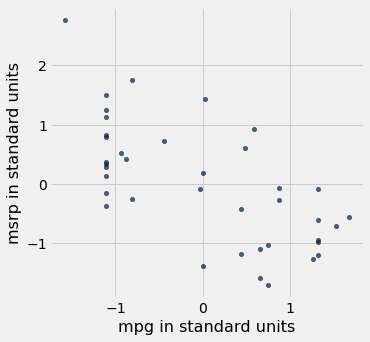

In [67]:
suv.scatter('mpg in standard units', 'msrp in standard units')

In [ ]:
suv

### Correlation coefficient: r

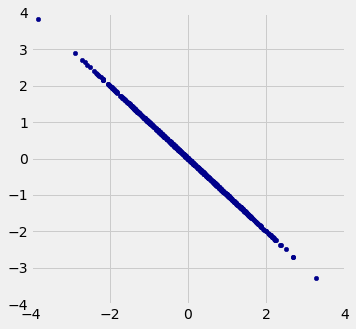

In [68]:
r_scatter(-1)

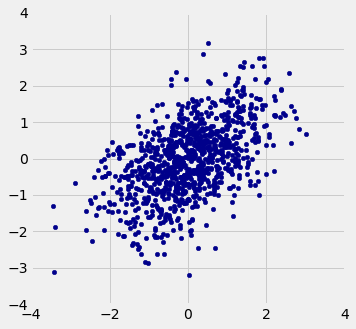

In [69]:
r_scatter(0.5)

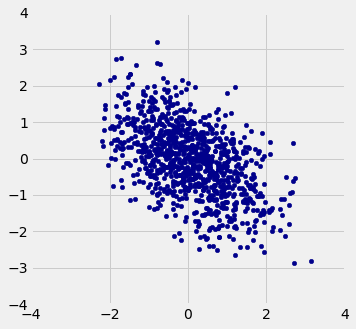

In [70]:
r_scatter(-0.5)

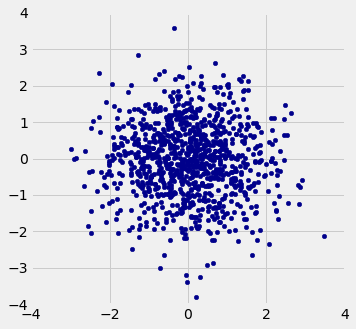

In [71]:
r_scatter(0)

### Nonlinearity ###

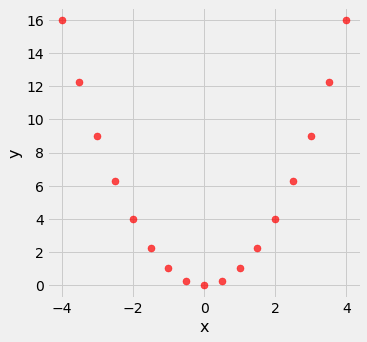

In [72]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=50, color='r')

In [73]:
correlation(nonlinear, 'x', 'y')

0.0

### Outliers ###

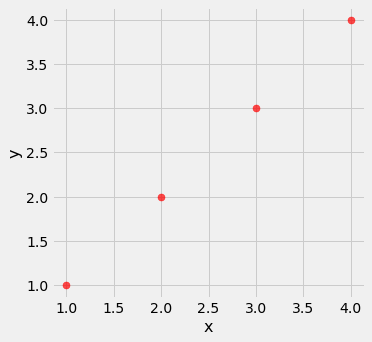

In [74]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=50, color='r')

In [75]:
correlation(line, 'x', 'y')

1.0

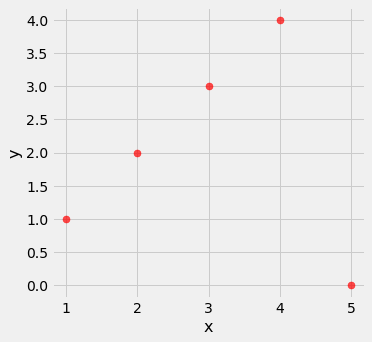

In [76]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=50, color='r')

In [77]:
correlation(outlier, 'x', 'y')

0.0

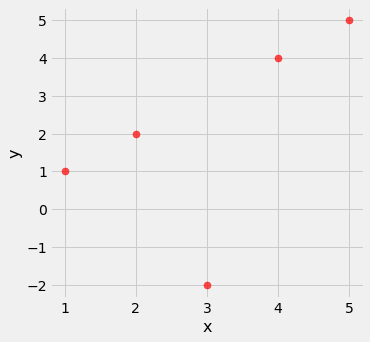

In [78]:
outlier2 = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, -2, 4, 5)
    )
outlier2.scatter('x', 'y', s=50, color='r')

In [79]:
correlation(outlier2, 'x', 'y')

0.5773502691896258

### Ecological correlations

In [80]:
election16 = Table.read_table('data/election2016_state.csv')
election16

State,Median Income,Percent voting for Clinton
Alabama,47221,0.343579
Alaska,75723,0.365509
Arizona,57100,0.45126
Arkansas,45907,0.336519
California,66637,0.617264
Colorado,70566,0.481565
Connecticut,75923,0.545663
Delaware,58046,0.53086
Florida,51176,0.478233
Georgia,53527,0.4564


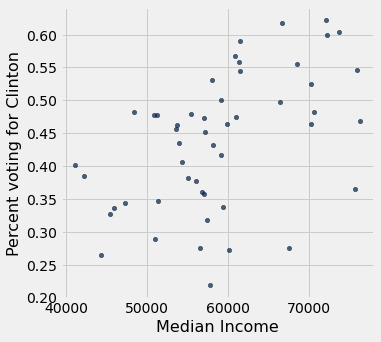

In [81]:
election16.scatter('Median Income', 'Percent voting for Clinton')

In [82]:
party = Table.read_table('data/party_affiliation2016.csv')
party

Income,Republican%,Democrat%,No leaning%
"Below 30,000",32,60,8
"30,000 to 39,999",47,46,7
"50,000 to 74,999",49,44,6
"75,000 to 99,999",48,44,8
"40,000 to 49,999",47,46,7
"100,000 to 149,999",51,45,4
"Above 150,000",46,48,6


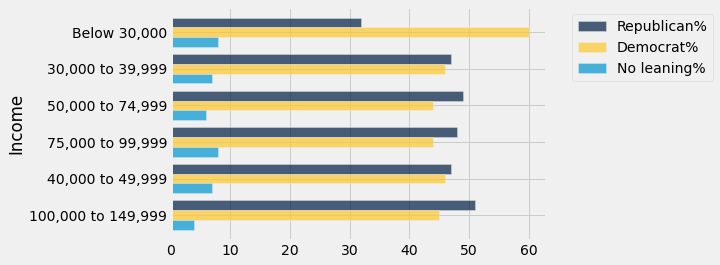

In [83]:
party.exclude(6).barh('Income')

In [88]:
sat2014 = Table.read_table('data/sat2014.csv').sort('State')
sat2014.where('State','California')

State,Participation Rate,Critical Reading,Math,Writing,Combined
California,60.3,498,510,496,1504


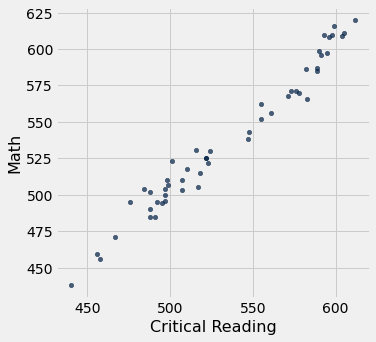

In [85]:
sat2014.scatter('Critical Reading', 'Math')

In [86]:
correlation(sat2014, 'Critical Reading', 'Math')

0.9847558411067434

## Prediction lines

In [89]:
example = r_table(0.99)
example.show(3)

x,y
0.0912047,-0.0680119
1.09128,1.04391
-1.94697,-1.88316


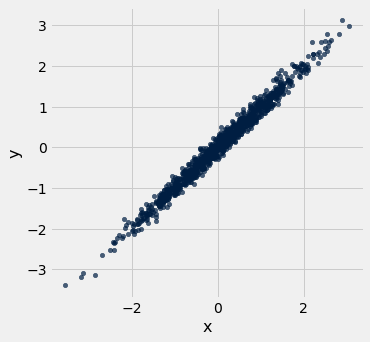

In [90]:
example.scatter('x', 'y')

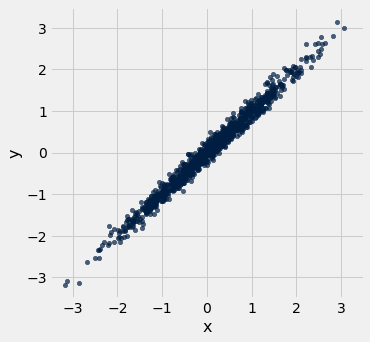

In [91]:
example.scatter('x', 'y')
resize_window()

In [92]:
def nn_prediction_example(x_val):
    """ Predicts y-value for x based on the example table """
    neighbors = example.where('x', are.between(x_val - .25, x_val + .25))
    return np.mean(neighbors.column('y'))
    

In [93]:
nn_prediction_example(-2.25)

-2.1476337989800522

In [96]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))

example

x,y,Predicted y
0.0912047,-0.0680119,0.104202
1.09128,1.04391,1.05235
-1.94697,-1.88316,-1.85456
-1.38635,-1.34674,-1.32041
-2.29649,-2.14933,-2.17514
2.40983,2.59627,2.41498
1.72784,1.76089,1.70671
2.20456,2.5933,2.12065
0.794828,0.778249,0.791607
0.976421,1.18139,0.947165


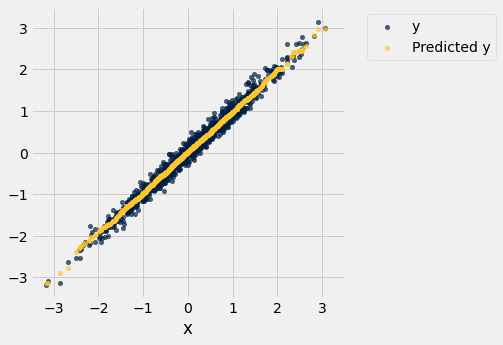

In [95]:
example.scatter('x')
resize_window()

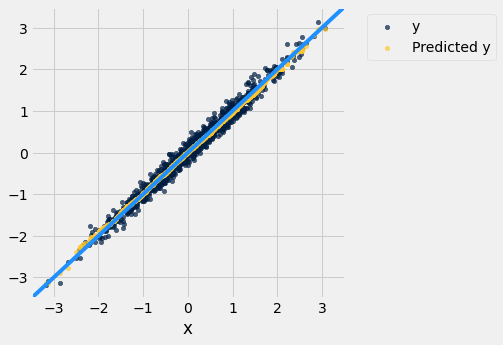

In [97]:
example.scatter('x')
draw_line(slope=1, color='dodgerblue')
resize_window()

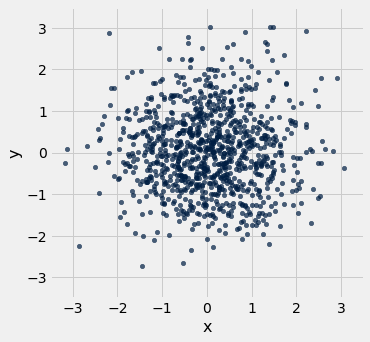

In [98]:
example = r_table(0)
example.scatter('x', 'y')
resize_window()

In [99]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))

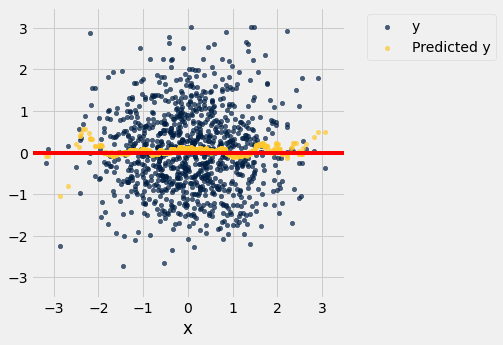

In [101]:
example = example.with_column(
    'Predicted y', example.apply(nn_prediction_example, 'x'))
example.scatter('x')
draw_line(slope = 0)
resize_window()

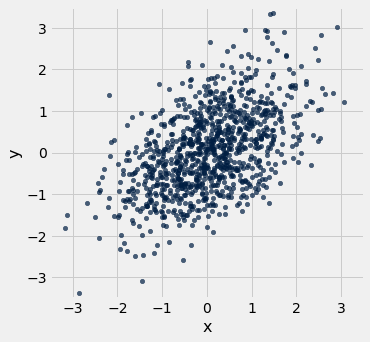

In [102]:
example = r_table(0.5)
example.scatter('x', 'y')
resize_window()

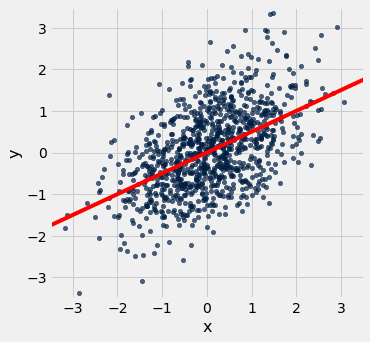

In [105]:
example = r_table(0.5)
example.scatter('x', 'y')
resize_window()
draw_line(slope = 0.5)

#draw_vertical_line(1.5)
#draw_line(slope=1, intercept=0)

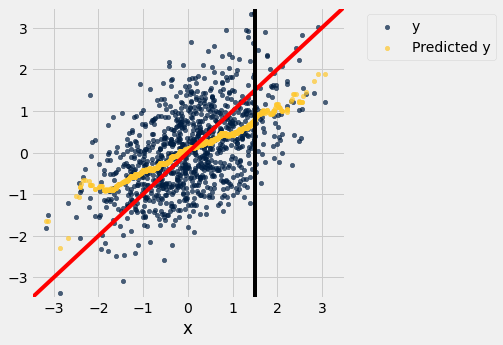

In [106]:
example = example.with_column('Predicted y', example.apply(nn_prediction_example, 'x'))
example.scatter('x')
draw_line(slope=1)
draw_vertical_line(1.5)
resize_window()

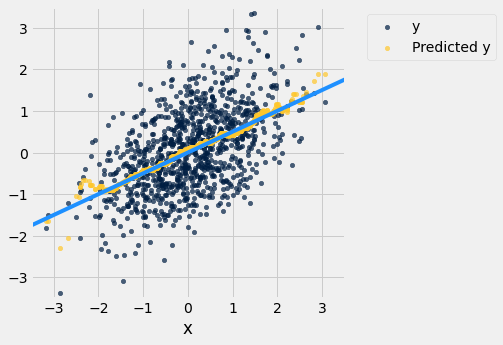

In [108]:
example.scatter('x')
#draw_line(slope=1, intercept=0, color='red')
draw_line(slope=0.5, intercept=0, color='dodgerblue')
resize_window()

## Linear regression: defining the line

In [109]:
# Copy-pasted from above
def standard_units(x):
    """Converts an array x to standard units"""
    return (x - np.mean(x)) / np.std(x)

def correlation(t, x, y):
    x_su = standard_units(t.column(x))
    y_su = standard_units(t.column(y))
    return np.mean(x_su * y_su)


In [ ]:
# TAKE HOME challenge below
def slope(t, x, y):
    ...

def intercept(t, x, y):
    ...

In [ ]:
example = r_table(0.5)
slope(example, 'x', 'y')

## Galton height data

In [110]:
galton = Table.read_table('data/galton.csv')

heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight'))
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


In [111]:
def nn_prediction_galton(h):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of h.
    
    The prediction is the average height of the children 
    whose midparent height is in the range h plus or minus 0.5 inches.
    """
    neighbors = heights.where(
        'MidParent', are.between(h - 0.5, h + 0.5))
    return np.mean(neighbors.column('Child'))

In [112]:
heights_with_predictions = heights.with_column(
    'Average neighbor prediction', 
    heights.apply(nn_prediction_galton, 'MidParent'))

In [113]:
galton_slope = slope(heights, 'MidParent', 'Child')
galton_intercept = intercept(heights, 'MidParent', 'Child')
galton_slope, galton_intercept

(None, None)

In [ ]:
heights.take(123)

In [ ]:
### Make prediction for child height


In [114]:
heights_with_predictions.where('MidParent', are.equal_to(69.48))

MidParent,Child,Average neighbor prediction
69.48,64,66.7588
69.48,74,66.7588
69.48,72,66.7588
69.48,69,66.7588
69.48,67.5,66.7588
69.48,63.5,66.7588
69.48,72,66.7588
69.48,71.5,66.7588
69.48,71.5,66.7588
69.48,70,66.7588


In [115]:
heights_with_predictions = heights_with_predictions.with_column(
    'Regression Prediction', 
    galton_slope*heights.column('MidParent') + galton_intercept
)
heights_with_predictions

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

In [ ]:
heights_with_predictions.scatter('MidParent')